In [ ]:
import pandas as pd
df=pd.read_csv('https://data.cityofnewyork.us/api/views/uip8-fykc/rows.csv?accessType=DOWNLOAD')

In [ ]:
df.shape

(170095, 19)

In [ ]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,77,0,45-64,F,BLACK,999335,186085,40.677426,-73.945615,POINT (-73.945615 40.677426)
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,73,0,25-44,M,BLACK,1009318,178259,40.655923,-73.909650,POINT (-73.90965 40.655923)
2,263664549,02/15/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,62,0,25-44,M,WHITE,982272,158771,40.602468,-74.007120,POINT (-74.00712 40.602468)
3,261345231,01/04/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,0,25-44,M,BLACK,999899,238684,40.821797,-73.943457,POINT (-73.943457 40.821797)
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,K,71,0,25-44,M,BLACK,1001437,183080,40.669175,-73.938042,POINT (-73.938042 40.669175)


In [ ]:
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [ ]:
#what is the most common reason the NYPD is arresting people for in 2023?
df.mode()['OFNS_DESC'][0]

'ASSAULT 3 & RELATED OFFENSES'

In [ ]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

<Axes: xlabel='count', ylabel='OFNS_DESC'>

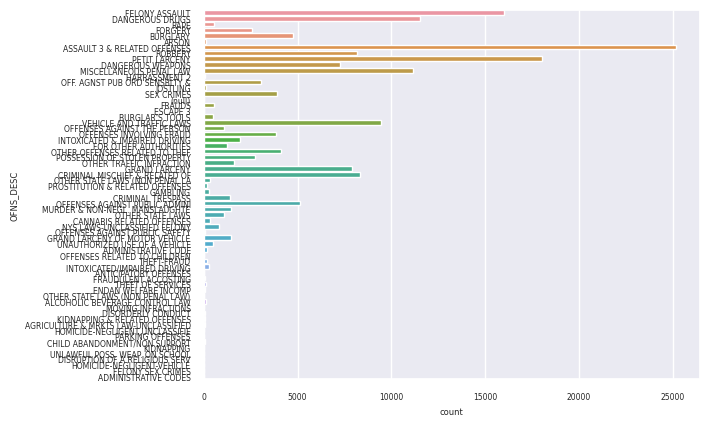

In [ ]:
#what is the distribution of the types of arrests across NYC in 2023?
sns.countplot(y="OFNS_DESC",data=df)

<Axes: xlabel='count', ylabel='ARREST_BORO'>

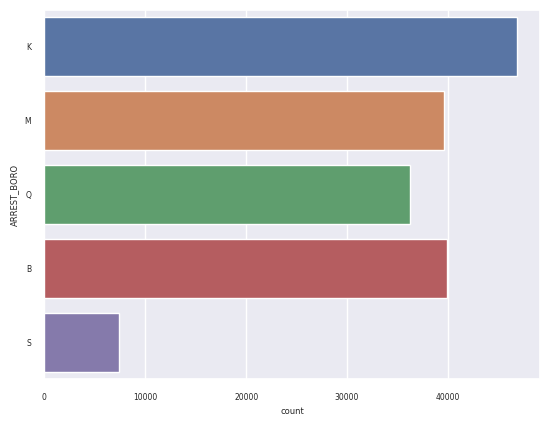

In [ ]:
#arrest by borough in 2023
sns.countplot(y="ARREST_BORO",data=df)

In [ ]:
#I decided to import another dataset that has previous years arrest data
df2=pd.read_json('https://data.cityofnewyork.us/resource/8h9b-rp9u.json')

In [ ]:
df2.head()

,arrest_key,arrest_date,pd_cd,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,...,longitude,lon_lat,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,pd_desc,ky_cd,ofns_desc
0,236791704,2021-11-22T00:00:00.000,581.0,PL 2225001,M,M,28,0,45-64,M,...,-73.952409,"{'type': 'Point', 'coordinates': [-73.95240854...",12423.0,18.0,4.0,36.0,18.0,NaN,NaN,NaN
1,237354740,2021-12-04T00:00:00.000,153.0,PL 1302502,F,B,41,0,25-44,M,...,-73.895296,"{'type': 'Point', 'coordinates': [-73.89529641...",10937.0,8.0,5.0,43.0,24.0,RAPE 3,104.0,RAPE
2,236081433,2021-11-09T00:00:00.000,681.0,PL 2601001,M,Q,113,0,25-44,M,...,-73.776047,"{'type': 'Point', 'coordinates': [-73.77604736...",24669.0,41.0,3.0,46.0,71.0,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES
3,32311380,2007-06-18T00:00:00.000,511.0,PL 2200300,M,Q,27,1,18-24,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS
4,192799737,2019-01-26T00:00:00.000,177.0,PL 1306503,F,M,25,0,45-64,M,...,-73.941109,"{'type': 'Point', 'coordinates': [-73.94110928...",13093.0,7.0,4.0,36.0,16.0,SEXUAL ABUSE,116.0,SEX CRIMES


In [ ]:
#I would like to isolate the year 2020
df2[df2['arrest_date'].str.contains('2020')]

,arrest_key,arrest_date,pd_cd,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,...,longitude,lon_lat,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,pd_desc,ky_cd,ofns_desc
11,221756278,2020-12-12T00:00:00.000,NaN,PL 2203400,F,M,23,0,25-44,M,...,-73.943132,"{'type': 'Point', 'coordinates': [-73.94313233...",12426.0,7.0,4.0,35.0,14.0,NaN,NaN,NaN
15,221870158,2020-12-15T00:00:00.000,297.0,PL 1150000,M,K,75,0,45-64,F,...,-73.872043,"{'type': 'Point', 'coordinates': [-73.87204263...",17215.0,45.0,2.0,25.0,47.0,"FACILITATION 4, CRIMINAL",354.0,ANTICIPATORY OFFENSES
16,220422940,2020-11-12T00:00:00.000,157.0,PL 1303502,F,Q,112,0,25-44,M,...,-73.851474,"{'type': 'Point', 'coordinates': [-73.85147389...",14786.0,40.0,3.0,28.0,70.0,RAPE 1,104.0,RAPE
19,222293770,2020-12-27T00:00:00.000,681.0,PL 2601001,M,B,43,0,25-44,M,...,-73.869690,"{'type': 'Point', 'coordinates': [-73.86969046...",11611.0,58.0,5.0,31.0,26.0,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES
20,214798896,2020-07-01T00:00:00.000,177.0,PL 1306504,F,B,46,0,25-44,M,...,-73.900121,"{'type': 'Point', 'coordinates': [-73.90012087...",10935.0,6.0,5.0,22.0,29.0,SEXUAL ABUSE,116.0,SEX CRIMES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,221023936,2020-11-27T00:00:00.000,101.0,PL 1200001,M,K,69,0,18-24,F,...,-73.889038,"{'type': 'Point', 'coordinates': [-73.88903835...",13827.0,5.0,2.0,8.0,42.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES
996,221791544,2020-12-14T00:00:00.000,748.0,PL 2155006,M,B,44,0,25-44,M,...,-73.913506,"{'type': 'Point', 'coordinates': [-73.91350629...",10934.0,50.0,5.0,42.0,27.0,"CONTEMPT,CRIMINAL",359.0,OFFENSES AGAINST PUBLIC ADMINI
997,221388175,2020-12-05T00:00:00.000,175.0,PL 13052A2,M,M,5,0,45-64,M,...,-73.997491,"{'type': 'Point', 'coordinates': [-73.99749074...",12076.0,70.0,4.0,32.0,2.0,"SEXUAL ABUSE 3,2",233.0,SEX CRIMES
998,221324206,2020-12-03T00:00:00.000,397.0,PL 1600500,F,B,41,0,25-44,M,...,-73.895824,"{'type': 'Point', 'coordinates': [-73.89582435...",10937.0,8.0,5.0,43.0,24.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY


In [ ]:
#I need to rename my findings
df2020=(df2[df2['arrest_date'].str.contains('2020')])

In [ ]:
df2020.columns

Index(['arrest_key', 'arrest_date', 'pd_cd', 'law_code', 'law_cat_cd',
       'arrest_boro', 'arrest_precinct', 'jurisdiction_code', 'age_group',
       'perp_sex', 'perp_race', 'x_coord_cd', 'y_coord_cd', 'latitude',
       'longitude', 'lon_lat', ':@computed_region_efsh_h5xi',
       ':@computed_region_f5dn_yrer', ':@computed_region_yeji_bk3q',
       ':@computed_region_92fq_4b7q', ':@computed_region_sbqj_enih', 'pd_desc',
       'ky_cd', 'ofns_desc'],
      dtype='object')

In [ ]:
df2020.dropna()

,arrest_key,arrest_date,pd_cd,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,...,longitude,lon_lat,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,pd_desc,ky_cd,ofns_desc
15,221870158,2020-12-15T00:00:00.000,297.0,PL 1150000,M,K,75,0,45-64,F,...,-73.872043,"{'type': 'Point', 'coordinates': [-73.87204263...",17215.0,45.0,2.0,25.0,47.0,"FACILITATION 4, CRIMINAL",354.0,ANTICIPATORY OFFENSES
16,220422940,2020-11-12T00:00:00.000,157.0,PL 1303502,F,Q,112,0,25-44,M,...,-73.851474,"{'type': 'Point', 'coordinates': [-73.85147389...",14786.0,40.0,3.0,28.0,70.0,RAPE 1,104.0,RAPE
19,222293770,2020-12-27T00:00:00.000,681.0,PL 2601001,M,B,43,0,25-44,M,...,-73.869690,"{'type': 'Point', 'coordinates': [-73.86969046...",11611.0,58.0,5.0,31.0,26.0,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES
20,214798896,2020-07-01T00:00:00.000,177.0,PL 1306504,F,B,46,0,25-44,M,...,-73.900121,"{'type': 'Point', 'coordinates': [-73.90012087...",10935.0,6.0,5.0,22.0,29.0,SEXUAL ABUSE,116.0,SEX CRIMES
28,220303765,2020-11-10T00:00:00.000,153.0,PL 1302501,F,Q,112,0,25-44,M,...,-73.851474,"{'type': 'Point', 'coordinates': [-73.85147389...",14786.0,40.0,3.0,28.0,70.0,RAPE 3,104.0,RAPE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,221023936,2020-11-27T00:00:00.000,101.0,PL 1200001,M,K,69,0,18-24,F,...,-73.889038,"{'type': 'Point', 'coordinates': [-73.88903835...",13827.0,5.0,2.0,8.0,42.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES
996,221791544,2020-12-14T00:00:00.000,748.0,PL 2155006,M,B,44,0,25-44,M,...,-73.913506,"{'type': 'Point', 'coordinates': [-73.91350629...",10934.0,50.0,5.0,42.0,27.0,"CONTEMPT,CRIMINAL",359.0,OFFENSES AGAINST PUBLIC ADMINI
997,221388175,2020-12-05T00:00:00.000,175.0,PL 13052A2,M,M,5,0,45-64,M,...,-73.997491,"{'type': 'Point', 'coordinates': [-73.99749074...",12076.0,70.0,4.0,32.0,2.0,"SEXUAL ABUSE 3,2",233.0,SEX CRIMES
998,221324206,2020-12-03T00:00:00.000,397.0,PL 1600500,F,B,41,0,25-44,M,...,-73.895824,"{'type': 'Point', 'coordinates': [-73.89582435...",10937.0,8.0,5.0,43.0,24.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY


In [ ]:
#what was the most common arrest reason in 2020?
df2020.mode()['ofns_desc'][0]

'ASSAULT 3 & RELATED OFFENSES'

<Axes: xlabel='count', ylabel='ofns_desc'>

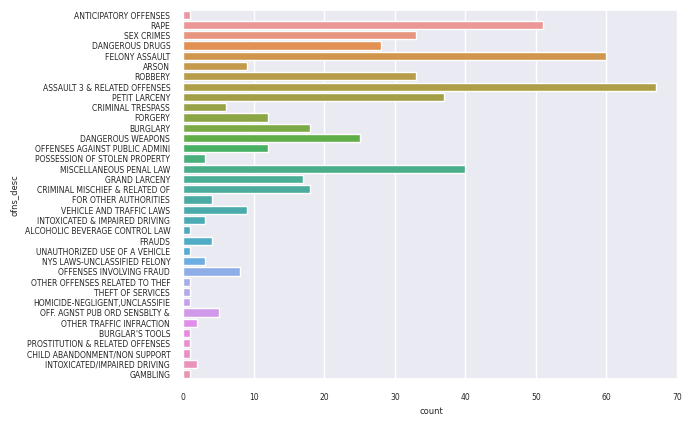

In [ ]:
#what is the distribution of the types of arrests across NYC in 2020?
sns.countplot(y="ofns_desc",data=df2020)


<Axes: xlabel='count', ylabel='arrest_boro'>

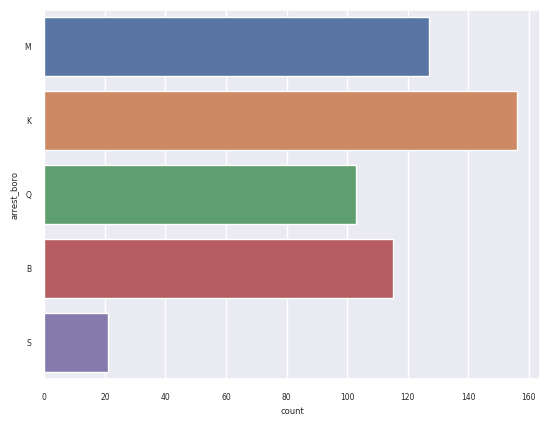

In [ ]:
#Arrest Distribution by Borough in 2020
sns.countplot(y="arrest_boro",data=df2020)

In [ ]:
#I would like to isolate the year 2021
df2[df2['arrest_date'].str.contains('2021')]

,arrest_key,arrest_date,pd_cd,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,...,longitude,lon_lat,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,pd_desc,ky_cd,ofns_desc
0,236791704,2021-11-22T00:00:00.000,581.0,PL 2225001,M,M,28,0,45-64,M,...,-73.952409,"{'type': 'Point', 'coordinates': [-73.95240854...",12423.0,18.0,4.0,36.0,18.0,NaN,NaN,NaN
1,237354740,2021-12-04T00:00:00.000,153.0,PL 1302502,F,B,41,0,25-44,M,...,-73.895296,"{'type': 'Point', 'coordinates': [-73.89529641...",10937.0,8.0,5.0,43.0,24.0,RAPE 3,104.0,RAPE
2,236081433,2021-11-09T00:00:00.000,681.0,PL 2601001,M,Q,113,0,25-44,M,...,-73.776047,"{'type': 'Point', 'coordinates': [-73.77604736...",24669.0,41.0,3.0,46.0,71.0,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES
6,237291769,2021-12-03T00:00:00.000,579.0,PL 2224001,F,Q,115,0,25-44,M,...,-73.876224,"{'type': 'Point', 'coordinates': [-73.87622400...",14782.0,3.0,3.0,21.0,73.0,NaN,NaN,NaN
7,236106641,2021-11-10T00:00:00.000,263.0,PL 1501001,F,B,41,72,25-44,M,...,-73.878332,"{'type': 'Point', 'coordinates': [-73.87833183...",12343.0,8.0,5.0,43.0,24.0,"ARSON 2,3,4",114.0,ARSON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,222563724,2021-01-03T00:00:00.000,109.0,PL 1200600,F,K,84,0,25-44,M,...,-73.988971,"{'type': 'Point', 'coordinates': [-73.98897094...",16865.0,68.0,2.0,38.0,54.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT
608,223153332,2021-01-15T00:00:00.000,175.0,PL 13052A1,M,M,32,14,45-64,M,...,-73.945420,"{'type': 'Point', 'coordinates': [-73.94542041...",12427.0,18.0,4.0,36.0,20.0,"SEXUAL ABUSE 3,2",233.0,SEX CRIMES
611,224127283,2021-02-09T00:00:00.000,109.0,PL 1200502,F,B,49,0,18-24,M,...,-73.843910,"{'type': 'Point', 'coordinates': [-73.84390995...",11270.0,59.0,5.0,12.0,32.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT
617,222500836,2021-01-01T00:00:00.000,263.0,PL 1501500,F,B,48,71,18-24,M,...,-73.882098,"{'type': 'Point', 'coordinates': [-73.88209820...",11269.0,35.0,5.0,43.0,31.0,"ARSON 2,3,4",114.0,ARSON


In [ ]:
#I need to rename my findings
df2021=df2[df2['arrest_date'].str.contains('2021')]

In [ ]:
#what was the most common arrest reason in 2021?
df2021.mode()['ofns_desc'][0]

'RAPE'

<Axes: xlabel='count', ylabel='ofns_desc'>

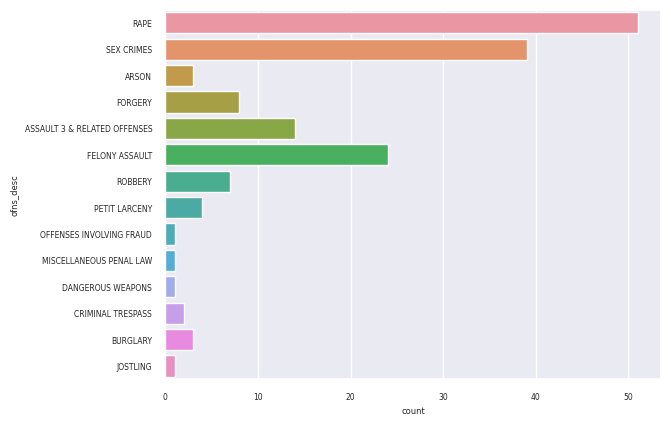

In [ ]:
#what is the distribution of the types of arrests across NYC in 2021?
sns.countplot(y="ofns_desc",data=df2021)

<Axes: xlabel='count', ylabel='arrest_boro'>

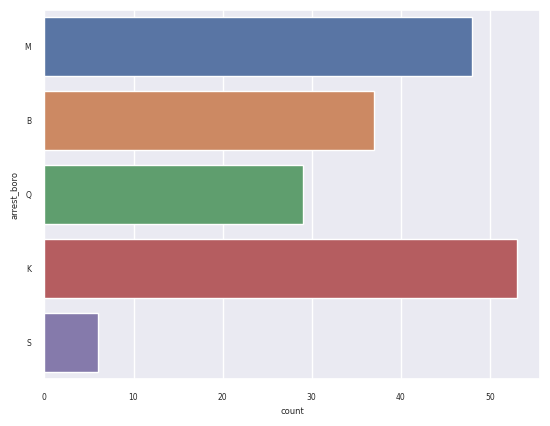

In [ ]:
#arrest by borough in 2021
sns.countplot(y="arrest_boro",data=df2021)

In [ ]:
##I would like to isolate the year 2021, but there is no data for the year 2022!
df2022=df2[df2['arrest_date'].str.contains('2022')]

,arrest_key,arrest_date,pd_cd,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,...,longitude,lon_lat,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,pd_desc,ky_cd,ofns_desc
